# **Data Collection and Preparation**


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

In [ ]:
data = pd.read_excel('account_churn_project.xlsx')

In [ ]:
print(data.shape)

(10127, 21)


In [ ]:
print(data.head())

   identification         churn_flag  age gender  number_dependants  \
0       768805383  Existing Customer   45      M                  3   
1       818770008  Existing Customer   49      F                  5   
2       713982108  Existing Customer   51      M                  3   
3       769911858  Existing Customer   40      F                  4   
4       709106358  Existing Customer   40      M                  3   

     education civil_status          income account_category  account_age  \
0  High School      Married     $60K - $80K             Blue           39   
1     Graduate       Single  Less than $40K             Blue           44   
2     Graduate      Married    $80K - $120K             Blue           36   
3  High School      Unknown  Less than $40K             Blue           34   
4   Uneducated      Married     $60K - $80K             Blue           21   

   ...  inactivity  past_contacts  card_Limit  balance  open_to_use  \
0  ...           1              3      

In [ ]:
# 1. Check data types
print("Data types:")
print(data.dtypes)

Data types:
identification                  int64
churn_flag                     object
age                             int64
gender                         object
number_dependants               int64
education                      object
civil_status                   object
income                         object
account_category               object
account_age                     int64
total_num_services              int64
inactivity                      int64
past_contacts                   int64
card_Limit                      int64
balance                         int64
open_to_use                     int64
change_per_quarter_amount       int64
total_transaction_amount        int64
total_transaction_count         int64
change_per_quarter_quantity     int64
average_use                     int64
dtype: object


In [ ]:
# 2. Check for missing values
print("\nMissing values by column:")
print(data.isnull().sum())


Missing values by column:
identification                 0
churn_flag                     0
age                            0
gender                         0
number_dependants              0
education                      0
civil_status                   0
income                         0
account_category               0
account_age                    0
total_num_services             0
inactivity                     0
past_contacts                  0
card_Limit                     0
balance                        0
open_to_use                    0
change_per_quarter_amount      0
total_transaction_amount       0
total_transaction_count        0
change_per_quarter_quantity    0
average_use                    0
dtype: int64


In [ ]:
# 3. Descriptive statistics
print("\nDescriptive statistics:")
print(data.describe())


Descriptive statistics:
       identification           age  number_dependants   account_age  \
count    1.012700e+04  10127.000000       10127.000000  10127.000000   
mean     7.391776e+08     46.325960           2.346203     35.928409   
std      3.690378e+07      8.016814           1.298908      7.986416   
min      7.080821e+08     26.000000           0.000000     13.000000   
25%      7.130368e+08     41.000000           1.000000     31.000000   
50%      7.179264e+08     46.000000           2.000000     36.000000   
75%      7.731435e+08     52.000000           3.000000     40.000000   
max      8.283431e+08     73.000000           5.000000     56.000000   

       total_num_services    inactivity  past_contacts    card_Limit  \
count        10127.000000  10127.000000   10127.000000  10127.000000   
mean             3.812580      2.341167       2.455317   9280.019552   
std              1.554408      1.010622       1.106225   9013.924409   
min              1.000000      0.00000

In [ ]:
# 4. Check for duplicates
print("\nNumber of duplicates:")
print(data.duplicated().sum())


Number of duplicates:
0


In [ ]:
# 5. Check value ranges
# Checking age
print("\nChecking inconsistent ages (less than 0 or greater than 120):")
print(data[(data['age'] < 0) | (data['age'] > 120)])

# Ensure all of this columns are positive or zero)
# List of columns you want to verify for int64 type and positive/zero values
columns = ['number_dependants', 'account_age', 'card_Limit', 'balance', 'open_to_use',
                    'total_transaction_amount', 'total_transaction_count', 'change_per_quarter_amount',
                    'change_per_quarter_quantity', 'average_use']

for column in columns:
    print(f"\nChecking {column} for negative values:")
    print(data[data[column] < 0])



Checking inconsistent ages (less than 0 or greater than 120):
Empty DataFrame
Columns: [identification, churn_flag, age, gender, number_dependants, education, civil_status, income, account_category, account_age, total_num_services, inactivity, past_contacts, card_Limit, balance, open_to_use, change_per_quarter_amount, total_transaction_amount, total_transaction_count, change_per_quarter_quantity, average_use]
Index: []

[0 rows x 21 columns]

Checking number_dependants for negative values:
Empty DataFrame
Columns: [identification, churn_flag, age, gender, number_dependants, education, civil_status, income, account_category, account_age, total_num_services, inactivity, past_contacts, card_Limit, balance, open_to_use, change_per_quarter_amount, total_transaction_amount, total_transaction_count, change_per_quarter_quantity, average_use]
Index: []

[0 rows x 21 columns]

Checking account_age for negative values:
Empty DataFrame
Columns: [identification, churn_flag, age, gender, number_dep

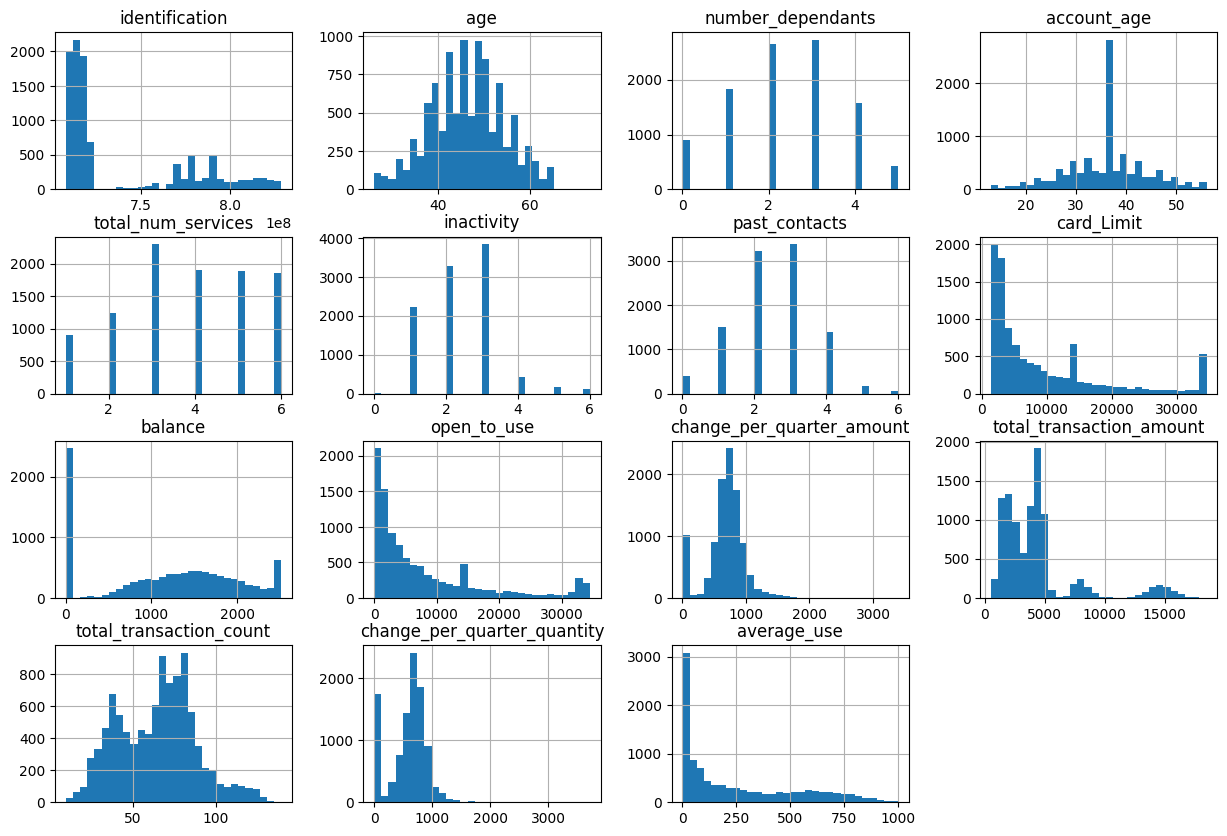

In [ ]:
data.hist(bins=30, figsize=(15, 10))
plt.show()

In [ ]:
# Map churn_flag values to binary (1 for Existing Customer, 0 for Attrited Customer)
data['churn_flag'] = data['churn_flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

# Map gender values ('M' becomes 0, 'F' becomes 1)
data['gender'] = data['gender'].map({'M': 0, 'F': 1})

# Transform categorical data into dummy/indicator variables
df_encoded = pd.get_dummies(data)

# Display the first 5 rows of the encoded DataFrame
print(df_encoded.head())

   identification  churn_flag  age  gender  number_dependants  account_age  \
0       768805383           0   45       0                  3           39   
1       818770008           0   49       1                  5           44   
2       713982108           0   51       0                  3           36   
3       769911858           0   40       1                  4           34   
4       709106358           0   40       0                  3           21   

   total_num_services  inactivity  past_contacts  card_Limit  ...  \
0                   5           1              3       12691  ...   
1                   6           1              2        8256  ...   
2                   4           1              0        3418  ...   
3                   3           4              1        3313  ...   
4                   5           1              0        4716  ...   

   income_$120K +  income_$40K - $60K  income_$60K - $80K  \
0           False               False                Tr

In [ ]:
# Create new features
df_encoded['card_utilization'] = df_encoded['balance'] / df_encoded['card_Limit']

In [ ]:
df_encoded.to_excel('modified_file .xlsx', index=False)

# **Exploratory Data Analysis**

# Visualizing Customer Churn with a Count Plot

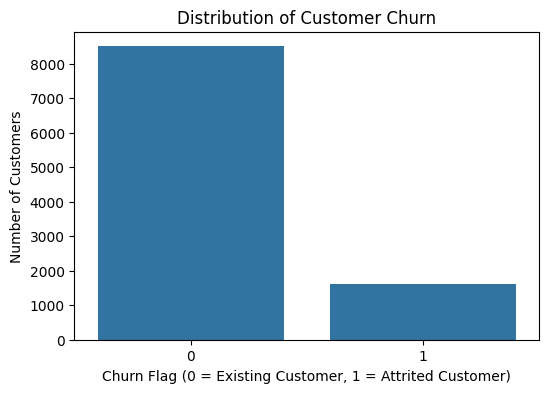

In [ ]:
plt.figure(figsize=(6,4))
# Create a count plot to display the distribution of churn flag Customer
ax = sns.countplot(x='churn_flag',data=df_encoded)
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn Flag (0 = Existing Customer, 1 = Attrited Customer)')
plt.ylabel('Number of Customers')
plt.show()

# Visualizing the Correlation Matrix of Features

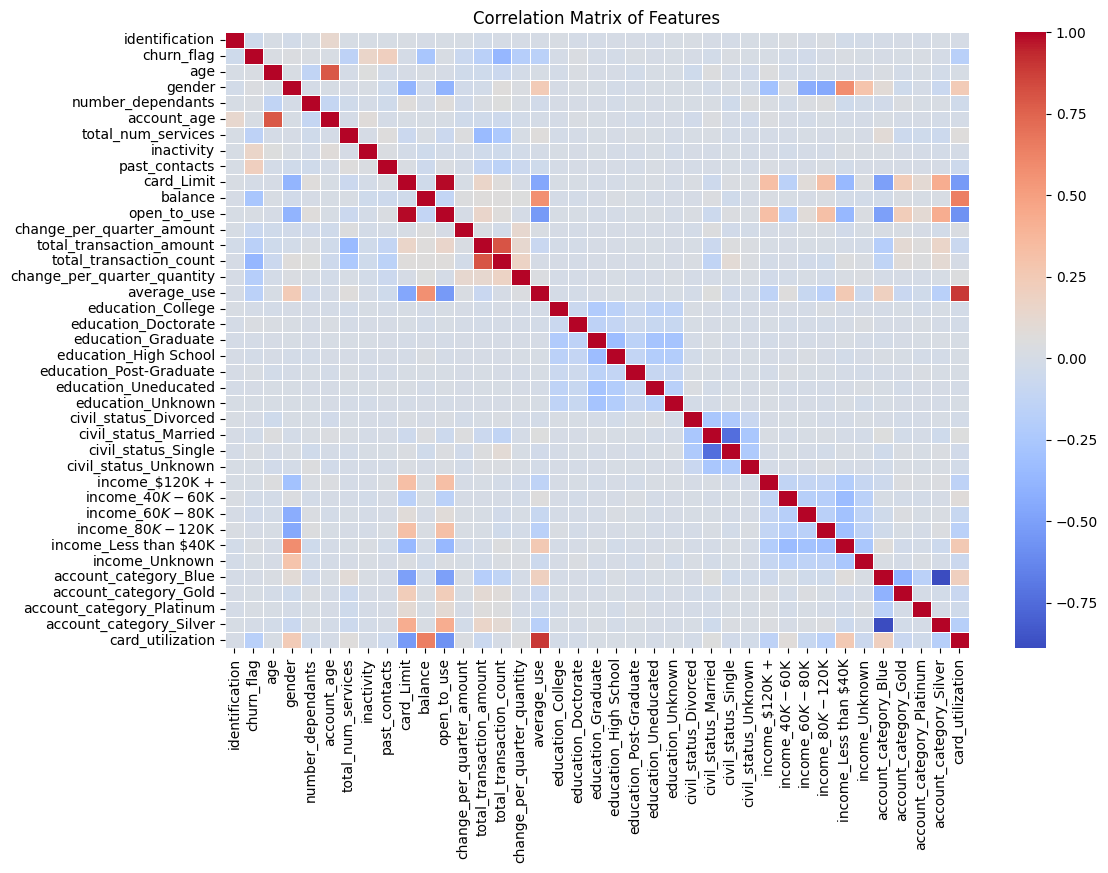

In [ ]:
plt.figure(figsize=(12,8))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
corr = df_encoded.corr()
target_corr = corr['churn_flag'].abs().sort_values(ascending=False)
print(target_corr.head(10))

churn_flag                     1.000000
total_transaction_count        0.371403
balance                        0.263053
past_contacts                  0.204491
change_per_quarter_quantity    0.195368
card_utilization               0.177722
total_transaction_amount       0.168598
average_use                    0.163300
inactivity                     0.152449
total_num_services             0.150005
Name: churn_flag, dtype: float64


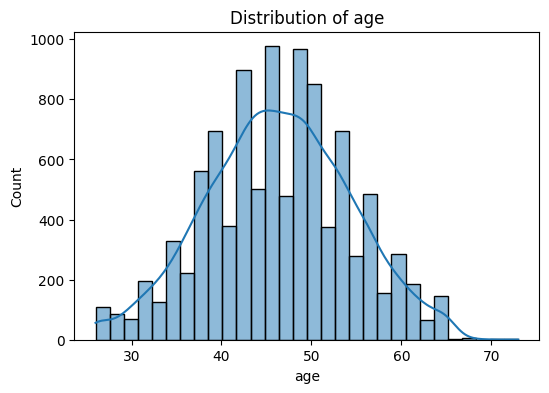

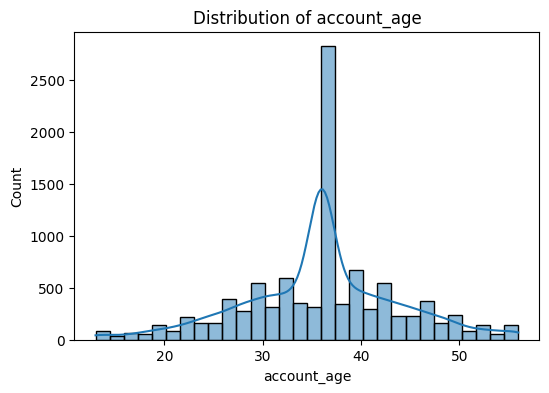

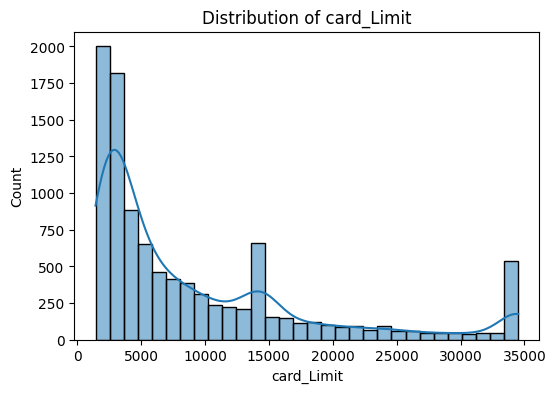

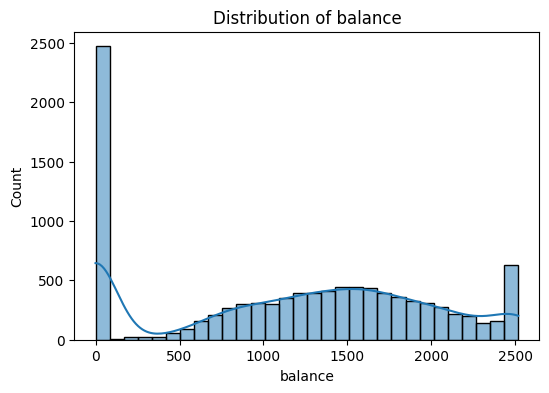

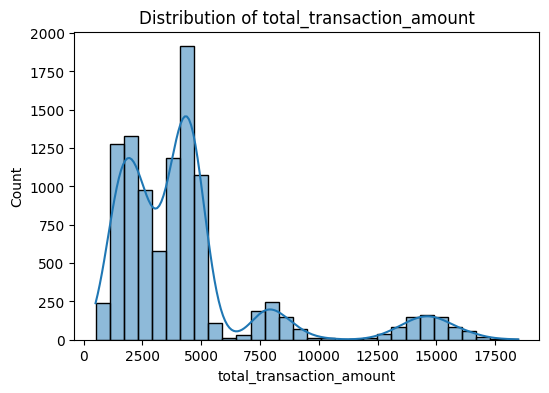

In [ ]:
# Visualize numerical distributions
num_vars = ['age', 'account_age', 'card_Limit', 'balance', 'total_transaction_amount']
for col in num_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_encoded[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

0 = existing custumers; 1 = attrited custumers


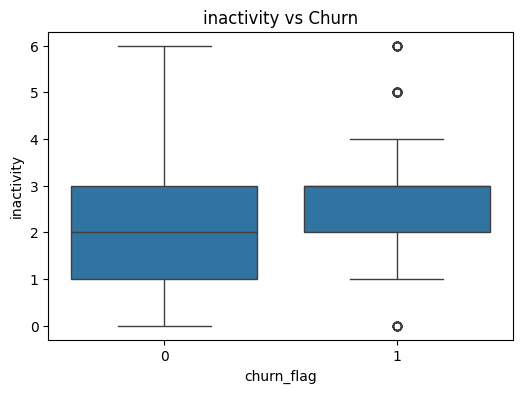

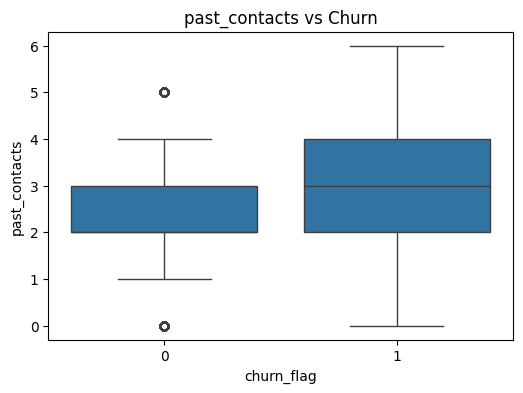

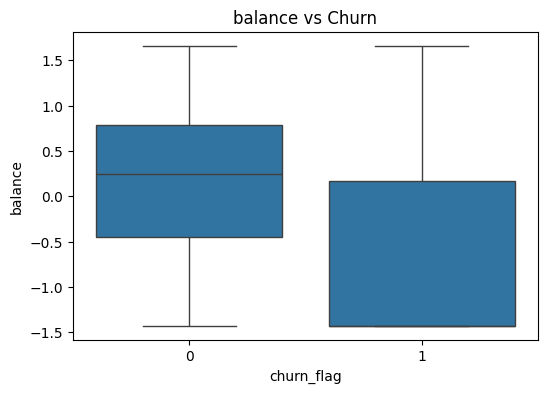

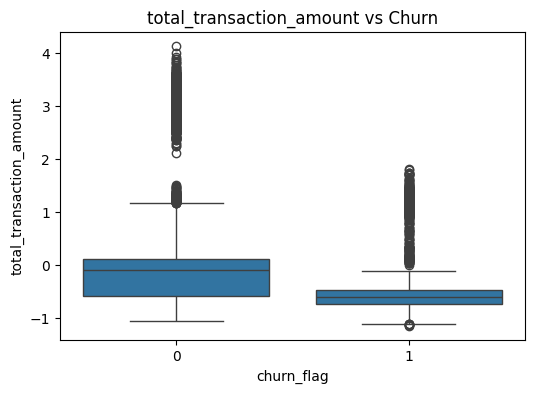

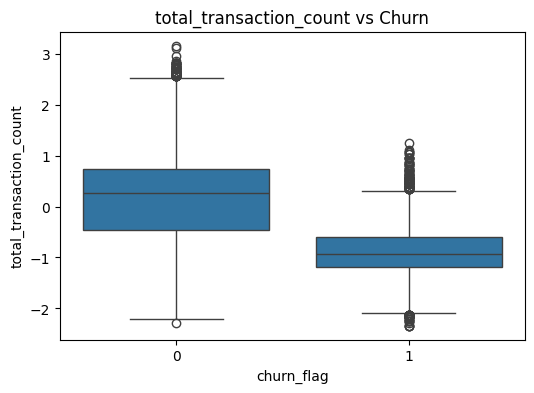

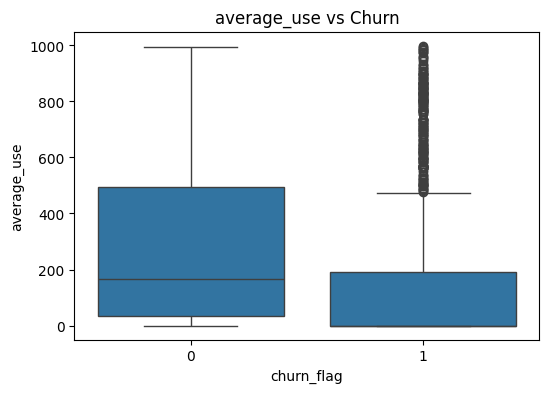

In [ ]:
# Boxplots for relationships

key_features = ['inactivity','past_contacts','balance','total_transaction_amount','total_transaction_count','average_use']
#'age', 'balance', 'card_Limit', 'total_transaction_amount','total_transaction_count','past_contacts','change_per_quarter_quantity','change_per_quarter_amount','average_use','inactivity','total_num_services','card_utilization']
#all_columns = df_encoded.columns
#columns_to_plot = [col for col in all_columns if col not in ['churn_flag', 'identification']]

#for feature in columns_to_plot:
   # plt.figure(figsize=(6, 4))
   # sns.boxplot(x='churn_flag', y=feature, data=df_encoded)
   # plt.title(f'{feature} vs Churn')
   # plt.show()

print('0 = existing custumers; 1 = attrited custumers')
for feature in key_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='churn_flag', y=feature, data=df_encoded)
    plt.title(f'{feature} vs Churn')
    plt.show()

0 = existing custumers; 1 = attrited custumers


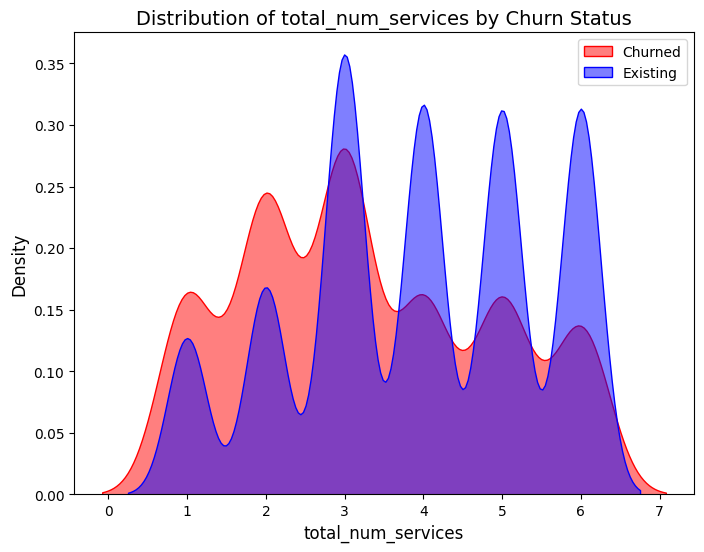

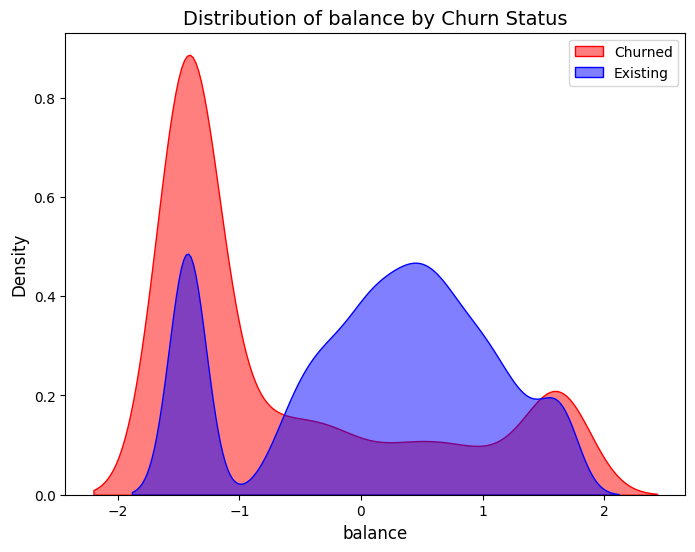

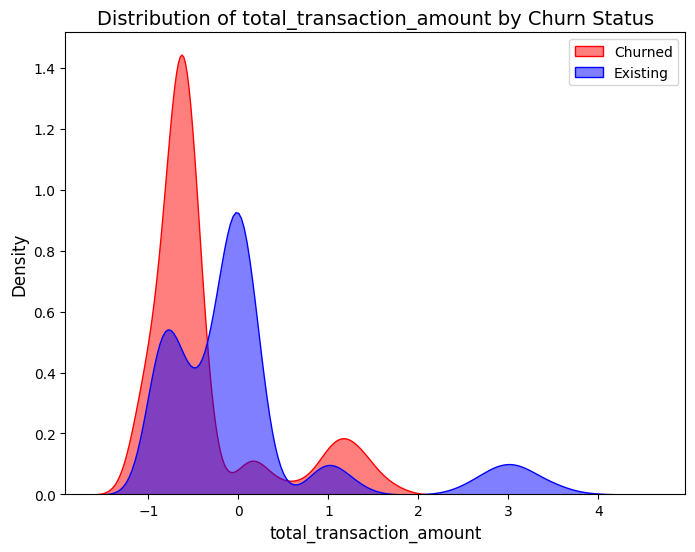

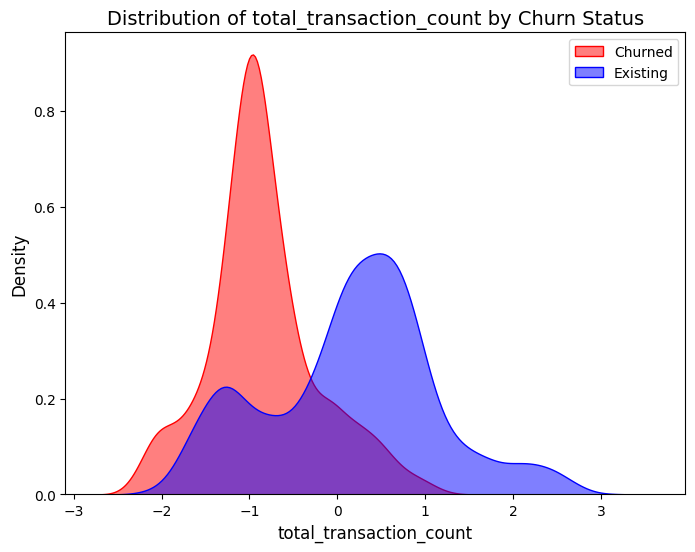

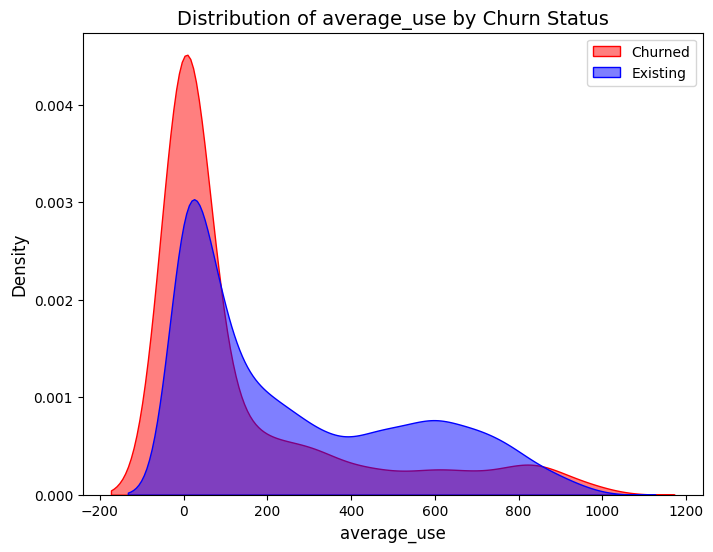

In [ ]:
# Overlay histograms or KDE plots for churned vs. existing customers
#key_features = ['balance', 'card_Limit','total_transaction_count','past_contacts','change_per_quarter_quantity','average_use','inactivity','total_num_services']
key_features = ['total_num_services', 'balance','total_transaction_amount','total_transaction_count','average_use']

print('0 = existing custumers; 1 = attrited custumers')
for feature in key_features:
#for feature in columns_to_plot:
    plt.figure(figsize=(8, 6))

    # KDE plot for churned customers
    sns.kdeplot(data=df_encoded[df_encoded['churn_flag'] == 1][feature],
                label='Churned', color='red', fill=True, alpha=0.5)

    # KDE plot for existing customers
    sns.kdeplot(data=df_encoded[df_encoded['churn_flag'] == 0][feature],
                label='Existing', color='blue', fill=True, alpha=0.5)

    plt.title(f'Distribution of {feature} by Churn Status', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    plt.show()

In [ ]:
# Scale numerical features
scaler = StandardScaler()
num_cols = ['age', 'number_dependants', 'account_age', 'card_Limit', 'balance',
           'total_transaction_amount', 'total_transaction_count']
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

print(df_encoded.head())

   identification  churn_flag       age  gender  number_dependants  \
0       768805383           0 -0.165406       0           0.503368   
1       818770008           0  0.333570       1           2.043199   
2       713982108           0  0.583058       0           0.503368   
3       769911858           0 -0.789126       1           1.273283   
4       709106358           0 -0.789126       0           0.503368   

   account_age  total_num_services  inactivity  past_contacts  card_Limit  \
0     0.384621                   5           1              3    0.378431   
1     1.010715                   6           1              2   -0.113610   
2     0.008965                   4           1              0   -0.650361   
3    -0.241473                   3           4              1   -0.662011   
4    -1.869317                   5           1              0   -0.506355   

   ...  income_$40K - $60K  income_$60K - $80K  income_$80K - $120K  \
0  ...               False                Tru

# **Feature Selection**

In [ ]:
corr = df_encoded.corr()
target_corr = corr['churn_flag'].abs().sort_values(ascending=False)
print(target_corr.head(10))

churn_flag                     1.000000
total_transaction_count        0.371403
balance                        0.263053
past_contacts                  0.204491
change_per_quarter_quantity    0.195368
card_utilization               0.177722
total_transaction_amount       0.168598
average_use                    0.163300
inactivity                     0.152449
total_num_services             0.150005
Name: churn_flag, dtype: float64


# **Model Building**

In [ ]:
# Split the dataset into training and testing subsets for model development and validation.
# Features and target
X = df_encoded.drop(columns=['churn_flag', 'identification'])
y = df_encoded['churn_flag']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
from sklearn.preprocessing import StandardScaler

# Assuming 'num_cols' contains the numerical features
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Logistic Regression

Logistic Regression Metrics:
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      2551
           1       0.50      0.81      0.62       488

    accuracy                           0.84      3039
   macro avg       0.73      0.83      0.76      3039
weighted avg       0.88      0.84      0.85      3039



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

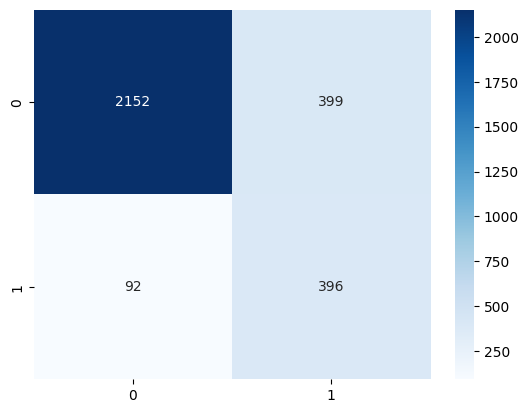

In [ ]:
# Logistic Regression
log_reg = LogisticRegression(class_weight='balanced', random_state=42,max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred_log = log_reg.predict(X_test)
print('Logistic Regression Metrics:')
print(classification_report(y_test, y_pred_log))

cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# K-Nearest Neighbors

In [ ]:
# KNN
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

knn = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(knn, knn_params, cv=3, scoring='f1')
knn_grid.fit(X_train_resampled, y_train_resampled)

# Best KNN
best_knn = knn_grid.best_estimator_
y_pred_knn = best_knn.predict(X_test)
print('KNN Metrics:')
print(classification_report(y_test, y_pred_knn))

KNN Metrics:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      2551
           1       0.32      0.50      0.39       488

    accuracy                           0.75      3039
   macro avg       0.61      0.65      0.62      3039
weighted avg       0.80      0.75      0.77      3039



# Random Forest

In [ ]:
# Random Forest
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_params = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='f1')
rf_grid.fit(X_train, y_train)

# Best Random Forest
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print('Random Forest Metrics:')
print(classification_report(y_test, y_pred_rf))

Random Forest Metrics:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2551
           1       0.81      0.83      0.82       488

    accuracy                           0.94      3039
   macro avg       0.89      0.90      0.89      3039
weighted avg       0.94      0.94      0.94      3039



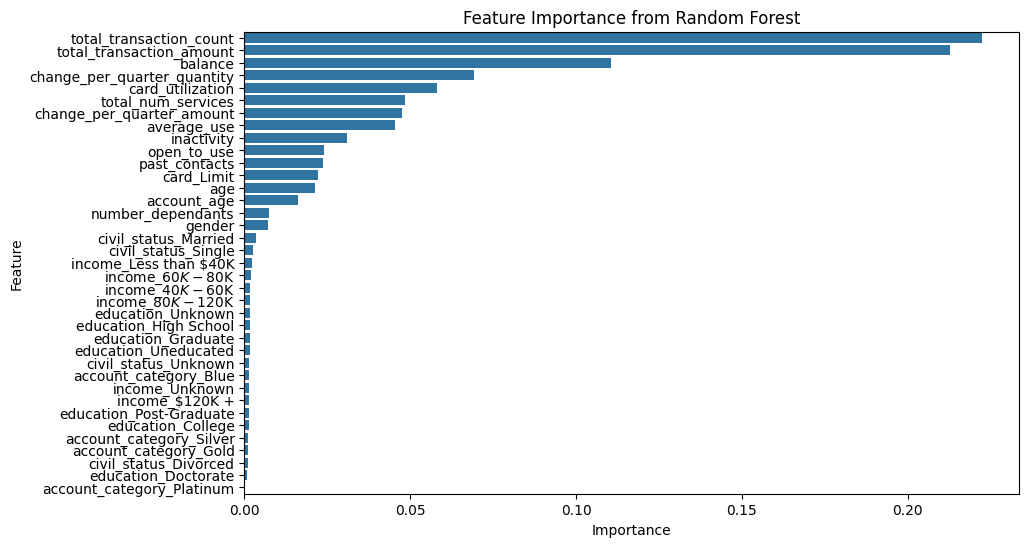

In [ ]:
# Feature importance from Random Forest
importances = best_rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.DataFrame({'Feature': X.columns,
                                    'Importance': rf.feature_importances_}).sort_values(by='Importance', ascending=False)
print(feature_importances)

                        Feature  Importance
11     total_transaction_amount    0.190330
12      total_transaction_count    0.163504
8                       balance    0.093679
4            total_num_services    0.068026
13  change_per_quarter_quantity    0.061804
36             card_utilization    0.058197
10    change_per_quarter_amount    0.054437
14                  average_use    0.045589
7                    card_Limit    0.035678
9                   open_to_use    0.034838
0                           age    0.031312
6                 past_contacts    0.029549
3                   account_age    0.025280
5                    inactivity    0.025108
2             number_dependants    0.014094
1                        gender    0.009217
23         civil_status_Married    0.005549
24          civil_status_Single    0.004867
17           education_Graduate    0.004137
30        income_Less than $40K    0.003749
21            education_Unknown    0.003446
28           income_$60K - $80K 

# **Model Evaluation**

Logistic Regression AUC: 0.9069
KNN AUC: 0.6896
Random Forest AUC: 0.9752


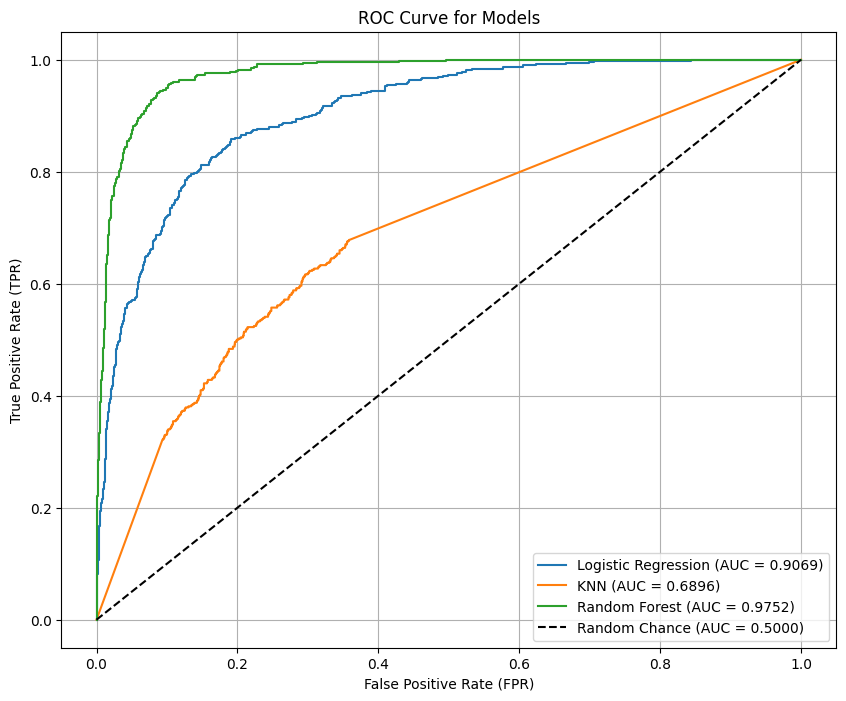

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Logistic Regression
y_pred_log_proba = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
log_reg_auc = roc_auc_score(y_test, y_pred_log_proba)
print(f"Logistic Regression AUC: {log_reg_auc:.4f}")

# K-Nearest Neighbors
y_pred_knn_proba = best_knn.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
knn_auc = roc_auc_score(y_test, y_pred_knn_proba)
print(f"KNN AUC: {knn_auc:.4f}")

# Random Forest
y_pred_rf_proba = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
rf_auc = roc_auc_score(y_test, y_pred_rf_proba)
print(f"Random Forest AUC: {rf_auc:.4f}")

# Plot ROC Curve for all models
plt.figure(figsize=(10, 8))

# Logistic Regression ROC
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_log_proba)
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {log_reg_auc:.4f})")

# KNN ROC
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn_proba)
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {knn_auc:.4f})")

# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {rf_auc:.4f})")

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance (AUC = 0.5000)")
plt.title("ROC Curve for Models")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()
